#### Imports & Downloads

In [2460]:
!pip install emoji
!pip install pyspellchecker
!pip install textblob 


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Nasiba\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Nasiba\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Nasiba\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2461]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from textblob import TextBlob
import nltk
import re
import string
import emoji
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from collections import Counter
from spellchecker import SpellChecker

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import BernoulliNB, MultinomialNB, ComplementNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score
import os
from wordcloud import WordCloud
pd.set_option('display.max_colwidth', None)


In [2462]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nasiba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nasiba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nasiba\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Nasiba\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### Beladung der Daten

In [2463]:

current_dir = os.getcwd()
csv_path  = os.path.abspath(os.path.join(current_dir, '../../../data/twitter_sentiment/train.csv'))
df_origin = pd.read_csv(csv_path, encoding='utf-8')

df_origin.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


## 1. Datenexploration

### 1.1 Datenqualitätsüberprüfung generell

In [2464]:
# Check for null values
df_origin.info()

# no null's

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [2465]:
# check for duplicates
print(df_origin.duplicated().sum())

# no duplicates 

0


### 1.2 Text Qualität Checks

##### 1.2.1 Überprüfung von stopwords

In [2466]:
# which words are actually stop words?
stop_words = set(stopwords.words('english'))

stop_words_list = list(stop_words)
print(stop_words_list)

["doesn't", 'ma', 'having', 'about', 'where', 'or', 'out', 'yourselves', 'ours', 'itself', 'what', 'wasn', 'at', 'she', 'don', 'has', 'who', "couldn't", 'couldn', 'myself', 'wouldn', "hasn't", 're', 'll', 'themselves', "that'll", 'will', "didn't", 'there', "haven't", "weren't", 'their', 'me', 'each', "isn't", "shouldn't", 'did', 'some', 'was', 'how', 'when', 'we', 'down', 'haven', "you're", 'were', 've', 'am', 'didn', 'so', 'doesn', 'in', 's', 'once', 'can', 't', 'just', 'under', 'both', 'now', 'off', 'have', "you've", 'by', 'ourselves', 'for', 'had', 'd', 'does', 'needn', 'few', 'hasn', 'to', 'doing', 'why', 'after', 'over', 'm', "shan't", 'himself', 'further', "don't", 'y', "mustn't", 'any', 'aren', 'do', "mightn't", 'theirs', 'more', 'which', 'those', 'again', 'yours', 'but', 'before', "hadn't", 'you', 'a', 'o', 'herself', 'same', 'yourself', 'from', 'then', 'nor', 'being', 'into', 'during', 'my', "wouldn't", 'are', 'other', 'only', "you'd", 'weren', 'through', 'an', 'they', "she's"

In [2467]:
# find stop words in tweet column
def find_stop_words(df):
    df['stopwords'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x in stop_words]))
    return df
df_raw= find_stop_words(df_origin)
df_raw[df_raw['stopwords'].notna()].head()

,id,label,tweet,stopwords
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,10
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,5
2,3,0,bihday your majesty,1
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,5
4,5,0,factsguide: society now #motivation,1


##### 1.2.2 Überprüfung von HTML tags/ special characters

In [2468]:
def find_hash_tags(df):
    df['hashtags'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
    return df
    
df_raw=find_hash_tags(df_raw)
df_raw[df_raw['hashtags']>0].head()

,id,label,tweet,stopwords,hashtags
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,10,1
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,5,3
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,5,1
4,5,0,factsguide: society now #motivation,1,1
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,6,1


##### 1.2.3 Überprüfung von Wörtern mit Großbuchstaben

In [2469]:
def find_num_uppercase(df):
    df['upper_case'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
    return df

df_raw=find_num_uppercase(df_raw)
df_raw[df_raw['upper_case']>0].head()


,id,label,tweet,stopwords,hashtags,upper_case
160,161,0,new selfie \Â¤.Â¤/ #guy #mato #chapones,0,3,1
554,555,0,come on #ee piss poor reception today Â£20 a month and struggle to get a signal in #buxton put more masts up or i'm switching #grumpy,9,3,1
1108,1109,1,"@user all happy for Ã¨ #lbgt family,but what i don't get is the incessant but thin veiled against other gay minorities?",10,1,1
1714,1715,0,over a year after leaving @user i received a demand for Â£12. should have told me when i left! #paidnow #fuckoffnevercomingbacktosky,11,2,1
2501,2502,0,#bahrain #youth #protesters #clash with #riot #police and #armoured #vehicles #Ø§ÙØ¨Ø­Ø±ÙÙ #Ø§ÙÙÙÙØ¯Ø±Ø§Øª,2,10,1


##### 1.2.4 Überprüfung von HTML Tags im Text

In [2470]:
def identify_html_tags(text):
    pattern = re.compile('<.*?>')
    tags = pattern.findall(text)
    tag_count = len(tags)
    return tag_count    

df_raw['html_tag_count'] = df_raw['tweet'].apply(identify_html_tags)
df_raw[df_raw['html_tag_count']>0]

# Conclusion: no html tags

,id,label,tweet,stopwords,hashtags,upper_case,html_tag_count


##### 1.2.5 Überprüfung von URL's im Text

In [2471]:
def identify_urls(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    urls = pattern.findall(text)
    tag_count = len(urls)
    return tag_count    

df_raw['url_count'] = df_raw['tweet'].apply(identify_urls)
df_raw[df_raw['url_count']>0]

,id,label,tweet,stopwords,hashtags,upper_case,html_tag_count,url_count
1111,1112,0,#fly #and #better #with #us #buranus #www.flybcc.com #call #7/24 #airbroker #flightâ¦,0,11,0,0,1
6375,6376,0,#isitthursdayyet? it's not? awwww... #criticalrole #critter,1,3,0,0,1
8084,8085,0,couple having sex www.drunk singapore girl get fuck,1,0,0,0,1
8484,8485,0,so glad my #workout includes smoke breaks...www.smokeweedeatbacon.com #weed #bacon #fitness #sex #health #marijuana #strength #living,2,9,0,0,1
8660,8661,0,@user just run 10kms for @user @user #loveisall pour donner: www.alvarum/heloiseetlespremas,2,1,0,0,1
25745,25746,0,@user sirrr getting new one wowwww... to see this plss take care of urself...love youððâ¤ï¸â¤ï¸â¤ï¸â¤ï¸,3,0,0,0,1


##### 1.2.6 Überprüfung von oft auftretenden Wörter im Text

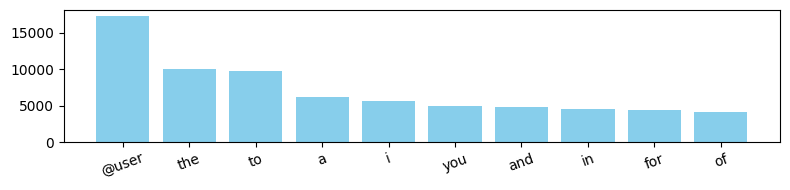

In [2472]:

freq_words = pd.Series(' '.join(df_raw['tweet']).split()).value_counts()[:10]

words = freq_words.index
counts = freq_words.values
plt.figure(figsize=(8, 2)) 
plt.bar(words, counts, color='skyblue') 

plt.xticks(rotation=20)
plt.tight_layout()  
plt.show()


##### 1.2.7 Überprüfung von shortcuts/slangs im Text

In [2473]:
shortcuts = {
    'ROFL': 'Rolling On The Floor Laughing',
    'STFU': 'Shut the f*** up',
    'ICYMI': 'In case you missed it',
    'TL;DR': 'Too long, didn’t read',
    'TMI': 'Too much information',
    'AFAIK': 'As Far As I Know',
    'LMK': 'Let me know',
    'NVM': 'Nevermind',
    'FTW': 'For the win',
    'BYOB': 'Bring your own beer',
    'BOGO': 'Buy one get one',
    'JK': 'Just kidding',
    'JW': 'Just wondering',
    'TGIF': 'Thank goodness it’s Friday',
    'TBH': 'To be honest',
    'TBF': 'To be frank',
    'RN': 'Right now',
    'FUBAR': 'F***** up beyond all recognition',
    'BRB': 'Be Right Back',
    'ISO': 'In search of',
    'BRT': 'Be Right There',
    'BTW': 'By The Way',
    'FTFY': 'Fixed that for you',
    'GG': 'Good Game',
    'BFD': 'Big freaking deal',
    'IRL': 'In Real Life',
    'DAE': 'Does anyone else?',
    'LOL': 'Laughing Out Loud',
    'SMH': 'Shaking My Head',
    'NGL': 'Not gonna lie',
    'BTS': 'Behind the scenes',
    'IKR': 'I Know Right',
    'TTYL': 'Talk to you later',
    'HMU': 'Hit me up',
    'FWIW': 'For what it’s worth',
    'IMO': 'In my opinion',
    'WYD': 'What are you doing?',
    'IMHO': 'In my humble opinion',
    'IDK': 'I Don’t Know',
    'IDC': 'I Don’t Care',
    'IDGAF': 'I don’t give a f***',
    'NBD': 'No big deal',
    'TBA': 'To be announced',
    'TBD': 'To be decided',
    'AFK': 'Away From Keyboard',
    'ABT': 'About',
    'IYKYK': 'If You Know You Know',
    'B4': 'Before',
    'BC': 'Because',
    'JIC': 'Just In Case',
    'FOMO': 'Fear Of Missing Out',
    'SNAFU': 'Situation Normal, All F***** Up',
    'GTG/G2G': 'Got To Go',
    'H8': 'Hate',
    'LMAO': 'Laughing My A** Off',
    'IYKWIM': 'If You Know What I Mean',
    'MYOB': 'Mind Your Own Business',
    'POV': 'Point Of View',
    'TLC': 'Tender Loving Care',
    'HBD': 'Happy Birthday',
    'W/E': 'Whatever',
    'WTF': 'What The F***',
    'WYSIWYG': 'What You See Is What You Get',
    'FWIF': 'For What It’s Worth',
    'TW': 'Trigger Warning',
    'EOD': 'End Of Day',
    'FAQ': 'Frequently Asked Question',
    'AKA': 'Also Known As',
    'ASAP': 'As Soon As Possible',
    'DIY': 'Do It Yourself',
    'LMGTFY': 'Let Me Google That For You',
    'NP': 'No Problem',
    'N/A': 'Not Applicable Or Not Available',
    'OOO': 'Out Of Office',
    'TIA': 'Thanks In Advance',
    'COB': 'Close Of Business',
    'FYI': 'For Your Information',
    'NSFW': 'Not Safe For Work',
    'WFH': 'Work From Home',
    'OMW': 'On My Way',
    'WDYT': 'What Do You Think?',
    'WYGAM': 'When You Get A Minute',
    'SMP': 'Social Media Platform',
    'DM': 'Direct Message',
    'FB': 'Facebook',
    'IG': 'Instagram',
    'LI': 'LinkedIn',
    'YT': 'YouTube',
    'SC': 'Snapchat',
    'BR': 'BeReal',
    'X': 'Previously Named Twitter',
    'WA': 'WhatsApp',
    'TT': 'TikTok',
    'FF': 'Follow Friday',
    'IM': 'Instant Message',
    'PM': 'Private Message',
    'OP': 'Original Post',
    'QOTD': 'Quote Of The Day',
    'OOTD': 'Outfit Of The Day',
    'RT': 'Retweet',
    'TBT': 'Throwback Thursday',
    'TIL': 'Today I Learned',
    'AMA': 'Ask Me Anything',
    'ELI5': 'Explain Like I’m 5',
    'FBF': 'Flashback Friday',
    'MFW': 'My Feeling When',
    'HMU': 'Hit Me Up',
    'GRWM': 'Get Ready With Me',
    'ILY': 'I Love You',
    'MCM': 'Man Crush Monday',
    'WCW': 'Woman Crush Wednesday',
    'BF': 'Boyfriend',
    'GF': 'Girlfriend',
    'LYSM': 'Love You So Much',
    'PDA': 'Public Display Of Affection',
    'LTR': 'Longterm Relationship',
    'DTR': 'Define The Relationship',
    'LDR': 'Long Distance Relationship',
    'XOXO': 'Hugs And Kisses',
    'OTP': 'One True Pairing',
    'LOML': 'Love Of My Life',
    'ATK': 'At The Keyboard',
    'ATM': 'At The Moment',
    'A3': 'Anytime, Anywhere, Anyplace',
    'BAK': 'Back At Keyboard',
    'BBL': 'Be Back Later',
    'BBS': 'Be Back Soon',
    'BFN': 'Bye For Now',
    'B4N': 'Bye For Now',
    'CU': 'See You',
    'CUL8R': 'See You Later',
    'CYA': 'See You',
    'FC': 'Fingers Crossed',
    'GAL': 'Get A Life',
    'GN': 'Good Night',
    'GMTA': 'Great Minds Think Alike',
    'GR8': 'Great!',
    'G9': 'Genius',
    'IC': 'I See',
    'ICQ': 'I Seek You (Also A Chat Program)',
    'ILU': 'I Love You',
    'IOW': 'In Other Words',
    'KISS': 'Keep It Simple, Stupid',
    'LTNS': 'Long Time No See',
    'L8R': 'Later',
    'MTE': 'My Thoughts Exactly',
    'M8': 'Mate',
    'NRN': 'No Reply Necessary',
    'OIC': 'Oh I See',
    'PITA': 'Pain In The A..',
    'PRT': 'Party',
    'PRW': 'Parents Are Watching',
    'QPSA?': 'Que Pasa?',
    'ROFLOL': 'Rolling On The Floor Laughing Out Loud',
    'ROTFLMAO': 'Rolling On The Floor Laughing My A** Off',
    'SK8': 'Skate',
    'STATS': 'Your Sex And Age',
    'ASL': 'Age, Sex, Location',
    'THX': 'Thank You',
    'TTFN': 'Ta-Ta For Now!',
    'U': 'You',
    'U2': 'You Too',
    'U4E': 'Yours For Ever',
    'WB': 'Welcome Back',
    'WTF': 'What The F***',
    'WTG': 'Way To Go!',
    'WUF': 'Where Are You From?',
    'W8': 'Wait...',
    '7K': 'Sick:-D Laugher',
    'TFW': 'That Feeling When',
    'MFW': 'My Face When',
    'MRW': 'My Reaction When',
    'IFYP': 'I Feel Your Pain',
    'TNTL': 'Trying Not To Laugh',
    'IMU': 'I Miss You',
    'ADIH': 'Another Day In Hell',
    'ZZZ': 'Sleeping, Bored, Tired',
    'WYWH': 'Wish You Were Here',
    'FIMH': 'Forever In My Heart',
    'BSAAW': 'Big Smile And A Wink',
    'BWL': 'Bursting With Laughter',
    'BFF': 'Best Friends Forever',
    'CSL': "Can't Stop Laughing",
    'OMG':"Oh my Good",
    "isn't": "is not",
    "he's": "he is",
    "wasn't": "was not",
    "there's": "there is",
    "couldn't": "could not",
    "won't": "will not",
    "they're": "they are",
    "she's": "she is",
    "There's": "there is",
    "wouldn't": "would not",
    "haven't": "have not",
    "That's": "That is",
    "you've": "you have",
    "He's": "He is",
    "what's": "what is",
    "weren't": "were not",
    "we're": "we are",
    "hasn't": "has not",
    "you'd": "you would",
    "shouldn't": "should not",
    "let's": "let us",
    "they've": "they have",
    "You'll": "You will",
    "i'm": "I am",
    "i´m": "I am",
    "we've": "we have",
    "it's": "it is",
    "don't": "do not",
    "that´s": "that is",
    "I´m": "I am",
    "it’s": "it is",
    "she´s": "she is",
    "he’s'": "he is",
    "I’m": "I am",
    "I’d": "I did",
    "he’s'": "he is",
    "there’s": "there is",
    "can't": "can not"
    }



In [2474]:
def expand_shortcuts(text):
    new_text = []
    for w in text.split():
        if w.upper() in shortcuts:
            new_text.append(shortcuts[w.upper()])
            return new_text
        else:
            None

df_raw['expanded_shortcut'] = df_raw['tweet'].apply(expand_shortcuts)
df_result = df_raw[df_raw['expanded_shortcut'].notna()]
df_result = df_result[['tweet', 'expanded_shortcut']]
df_result


,tweet,expanded_shortcut
3,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,[You]
18,its #friday! ð smiles all around via ig user: @user #cookies make people,[Instagram]
46,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,[You]
47,#whenever im and #something goes #wrong |,[Instant Message]
96,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,[You]
...,...,...
31631,"fake fb accounts =&gt; seems it's common, but how nasty to accuse people without proof !! #paranoia",[Facebook]
31672,@user idk why women think they can have a mans hea when his hea is elsewhere,[I Don’t Know]
31785,@user doesn't care abt u. let's be honest. he cares about himself &amp; his money!! all of you are getting played. #neverump,[About]
31904,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,[You]


##### 1.2.7 Überprüfung von emojis im Text

In [2475]:

def fix_mojibake(text):
    try:

        return text.encode('latin1').decode('utf-8')
    except (UnicodeEncodeError, UnicodeDecodeError):
        return text


df_raw['tweet'] = df_raw['tweet'].apply(fix_mojibake)
df_raw.head(3)


,id,label,tweet,stopwords,hashtags,upper_case,html_tag_count,url_count,expanded_shortcut
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,10,1,0,0,0,None
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,5,3,0,0,0,None
2,3,0,bihday your majesty,1,0,0,0,0,None


##### 1.2.8 Überprüfung von falsch geschriebenen Wörtern im Text

In [2476]:
spell = SpellChecker()
def identify_misspelled_words(text):
    words = text.split()

    misspelled = [
        word for word in words 
        if not any(emoji.is_emoji(char) for char in word)  # Ignoriere Emojis
        and not word.startswith('@')  # Ignoriere Wörter, die mit @ beginnen
        and not word.startswith('#')  # Ignoriere Wörter, die mit # beginnen
        and word in spell.unknown([word])  # Führe Rechtschreibprüfung auf verbleibende Wörter durch
        and not word.endswith('!')
        and not word.endswith(']')
        and not word.startswith('[')
    ]
    return misspelled

df_raw['misspelled_words'] = df_raw['tweet'].apply(identify_misspelled_words)
df_raw[['tweet', 'misspelled_words']]

,tweet,misspelled_words
0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,[dysfunction.]
1,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,[pdx.]
2,bihday your majesty,[bihday]
3,#model i love u take with u all the time in ur📱!!! 😙😎👄👅💦💦💦,[]
4,factsguide: society now #motivation,[factsguide:]
...,...,...
31957,ate @user isz that youuu?😍😍😍😍😍😍😍😍😍❤️,[isz]
31958,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher,"[nina, shirley, chisolm.]"
31959,listening to sad songs on a monday morning otw to work is sad,"[monday, otw]"
31960,"@user #sikh #temple vandalised in in #calgary, #wso condemns act",[vandalised]


##### 1.2.9 Überprüfung Anzahl der Wörtern in Tweets

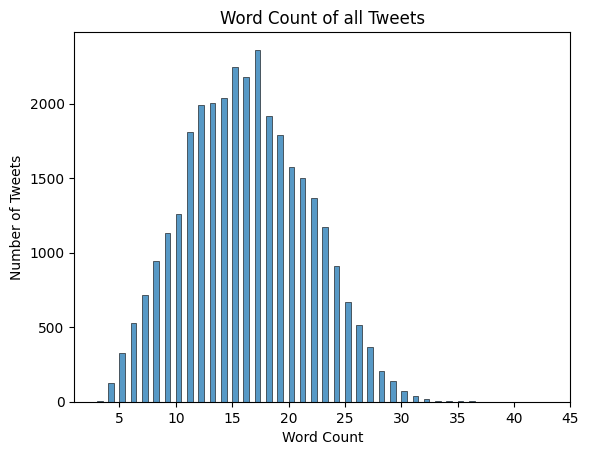

<Figure size 400x200 with 0 Axes>

In [2477]:

df_raw['count_of_words'] = df_raw['tweet'].apply(lambda x : len(str(x).split(" ")))

sns.histplot(df_raw['count_of_words'])

plt.title('Word Count of all Tweets')

plt.xlabel('Word Count')
plt.ylabel('Number of Tweets')
plt.figure(figsize=(4, 2)) 
plt.show()

## 2. Daten Vorbereitung 

### 2.1 Datenbereinigung

##### 2.1.1 Entfernung von special characters, @user

In [2478]:
def remove_special_characters(df):
    pattern = re.compile(r'<.*?>|@\w+|[\/§&]')
    
    df['tweet'] = df['tweet'].apply(lambda x: pattern.sub('', x))
    
    return df
df_cleaned=remove_special_characters(df_raw)
df_cleaned.head(2)


,id,label,tweet,stopwords,hashtags,upper_case,html_tag_count,url_count,expanded_shortcut,misspelled_words,count_of_words
0,1,0,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,10,1,0,0,0,None,[dysfunction.],21
1,2,0,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,5,3,0,0,0,None,[pdx.],22


##### 2.1.2 Entfernung von URL's im Text

In [2479]:
def remove_url_from_tweet(df):
    pattern=re.compile(r'https?://\S+|www\.\S+')
    df['tweet']=df['tweet'].apply(lambda x: pattern.sub('', x))
    return df  
df_cleaned=remove_url_from_tweet(df_cleaned)
df_cleaned.head(1)

,id,label,tweet,stopwords,hashtags,upper_case,html_tag_count,url_count,expanded_shortcut,misspelled_words,count_of_words
0,1,0,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,10,1,0,0,0,None,[dysfunction.],21


##### 2.1.3 Entfernung von Punkten, Kommas

In [2480]:
def remove_punctuation(df):
    pattern = re.compile(r'[.:,\[\]/%&§{}]')
    df['tweet'] = df['tweet'].apply(lambda x: pattern.sub('', x))
    return df
df_cleaned=remove_punctuation(df_cleaned)
df_cleaned.head(1)

,id,label,tweet,stopwords,hashtags,upper_case,html_tag_count,url_count,expanded_shortcut,misspelled_words,count_of_words
0,1,0,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run,10,1,0,0,0,None,[dysfunction.],21


##### 2.1.4 Entfernung von Nummern:

In [2481]:
def remove_digis(df):
    pattern = re.compile(r'\d')
    df['tweet'] = df['tweet'].apply(lambda x: pattern.sub('', x))
    return df
df_cleaned=remove_digis(df_cleaned)
df_cleaned.head(1)

,id,label,tweet,stopwords,hashtags,upper_case,html_tag_count,url_count,expanded_shortcut,misspelled_words,count_of_words
0,1,0,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run,10,1,0,0,0,None,[dysfunction.],21


##### 2.1.5 Extraktion/Korrektur von shortcuts/slangs im Text

In [2482]:
def expand_shortcuts_result(text):
    new_text = []
    for w in text.split():
        
        if w.upper() in shortcuts:
            new_text.append(shortcuts[w.upper()])  # Ersetzen, wenn es ein Shortcut ist
        if w in shortcuts:
            new_text.append(shortcuts[w])
        else:
            new_text.append(w)  # sonst original beibehalten
    
    return ' '.join(new_text)

df_cleaned['tweet'] = df_cleaned['tweet'].apply(expand_shortcuts_result)
result=df_cleaned[df_cleaned['expanded_shortcut'].notna()].head(2)
result


,id,label,tweet,stopwords,hashtags,upper_case,html_tag_count,url_count,expanded_shortcut,misspelled_words,count_of_words
3,4,0,#model i love You u take with You u all the time in ur📱!!! 😙😎👄👅💦💦💦,5,1,0,0,0,[You],[],17
18,19,0,its #friday! 😀 smiles all around via Instagram ig user #cookies make people,2,2,0,0,0,[Instagram],"[ig, user:]",16


##### 2.1.6 Entfernung von Stopwords

In [2483]:
stop_words = set(stopwords.words('english'))
def remove_stop_words(df):
  
    df['tweet'] = df['tweet'].apply(lambda x: " ".join(w for w in x.split() if w.lower() not in stop_words))
    return df

clenead_df = remove_stop_words(df_cleaned)
clenead_df.head(10)

,id,label,tweet,stopwords,hashtags,upper_case,html_tag_count,url_count,expanded_shortcut,misspelled_words,count_of_words
0,1,0,father dysfunctional selfish drags kids dysfunction #run,10,1,0,0,0,None,[dysfunction.],21
1,2,0,thanks #lyft credit use cause offer wheelchair vans pdx #disapointed #getthanked,5,3,0,0,0,None,[pdx.],22
2,3,0,bihday majesty,1,0,0,0,0,None,[bihday],5
3,4,0,#model love u take u time ur📱!!! 😙😎👄👅💦💦💦,5,1,0,0,0,[You],[],17
4,5,0,factsguide society #motivation,1,1,0,0,0,None,[factsguide:],8
5,6,0,huge fan fare big talking leave chaos pay disputes get #allshowandnogo,6,1,0,0,0,None,"[leave., there.]",21
6,7,0,camping tomorrow danny…,0,0,0,0,0,None,[danny…],12
7,8,0,next school year year exams😯 think 😭 #school #exams #hate #imagine #actorslife #revolutionschool #girl,6,7,0,0,0,None,[],23
8,9,0,won!!! love land!!! #allin #cavs #champions #cleveland #clevelandcavaliers …,2,5,0,0,0,None,[…],13
9,10,0,welcome ! #gr !,3,1,0,0,0,None,[i'm],15


##### 2.1.6  Korrektur von Großbuchstaben in Wörtern

In [2484]:
def to_lowercase_if_string(text):
    if isinstance(text, str):  
        return text.lower()     
    return text                

df_cleaned['tweet'] = df_cleaned['tweet'].fillna('').apply(to_lowercase_if_string)
result = df_cleaned[df_cleaned['upper_case'] > 0].head(2)
result


,id,label,tweet,stopwords,hashtags,upper_case,html_tag_count,url_count,expanded_shortcut,misspelled_words,count_of_words
160,161,0,new selfie \¤¤ #guy #mato #chapones,0,3,1,0,0,None,"[selfie, \¤.¤/]",10
554,555,0,come #ee piss poor reception today £ month struggle get signal #buxton put masts switching #grumpy,9,3,1,0,0,None,"[£20, i'm]",28


##### 2.1.7  Korrektur von falsch geschriebenen Wörtern im Text

In [2485]:
df_cleaned['tweet'] = df_cleaned['tweet'].str.replace('user', ' ', case=False)

def identify_misspelled_words(text):
    words = text.split()

    misspelled = [
        word for word in words 
        if not any(emoji.is_emoji(char) for char in word)  # Ignoriere Emojis
        and not word.startswith('@')  # Ignoriere Wörter, die mit @ beginnen
        and not word.startswith('#')  # Ignoriere Wörter, die mit # beginnen
        and not word.endswith('!')
        and not word.startswith("'")
        and not word.endswith("'")
        and word in spell.unknown([word]) 
    ]
    
    if len(misspelled)==0:
        return None 
    else:
        return misspelled

df_cleaned['misspelled_words_new'] = df_cleaned['tweet'].apply(identify_misspelled_words)

df_cleaned.head(5)

,id,label,tweet,stopwords,hashtags,upper_case,html_tag_count,url_count,expanded_shortcut,misspelled_words,count_of_words,misspelled_words_new
0,1,0,father dysfunctional selfish drags kids dysfunction #run,10,1,0,0,0,None,[dysfunction.],21,None
1,2,0,thanks #lyft credit use cause offer wheelchair vans pdx #disapointed #getthanked,5,3,0,0,0,None,[pdx.],22,[pdx]
2,3,0,bihday majesty,1,0,0,0,0,None,[bihday],5,[bihday]
3,4,0,#model love u take u time ur📱!!! 😙😎👄👅💦💦💦,5,1,0,0,0,[You],[],17,None
4,5,0,factsguide society #motivation,1,1,0,0,0,None,[factsguide:],8,[factsguide]


In [2486]:
# Dataframe in kleinere Subsets verteilen, damit die Funktion schneller ist

#df_cleaned_1 = df_cleaned.iloc[0:2001]
df_cleaned_2 = df_cleaned.iloc[2001:4001]
# df_cleaned_3 = df_cleaned.iloc[4001:6001]
# df_cleaned_4 = df_cleaned.iloc[6001:8001]
# df_cleaned_5 = df_cleaned.iloc[8001:10001]
# df_cleaned_7 = df_cleaned.iloc[10001:12001]
# df_cleaned_8 = df_cleaned.iloc[12001:14001]
# df_cleaned_9 = df_cleaned.iloc[6001:8001]
# df_cleaned_10 = df_cleaned.iloc[6001:8001]
# df_cleaned_11 = df_cleaned.iloc[6001:8001]
# df_cleaned_12 = df_cleaned.iloc[6001:8001]
# df_cleaned_13 = df_cleaned.iloc[6001:8001]
# df_cleaned_14 = df_cleaned.iloc[6001:8001]
# df_cleaned_15 = df_cleaned.iloc[6001:8001]
df_cleaned_2.head(5)

,id,label,tweet,stopwords,hashtags,upper_case,html_tag_count,url_count,expanded_shortcut,misspelled_words,count_of_words,misspelled_words_new
2001,2002,0,makes ?? stick post-it put mirror 😊 📍spotted #sanfrancisco,10,1,0,0,0,None,"[??, post-it,]",22,"[??, post-it]"
2002,2003,0,always tears #anime,3,1,0,0,0,None,[],9,None
2003,2004,0,resurrected twitter dead back guys! conveniently time euros! #euro #europaleaguefinal !,10,2,0,0,0,None,[dead.],22,None
2004,2005,0,unfounate today aids control hate kills gays yearly #orlando,8,1,0,0,0,None,"[unfounate, not,]",20,[unfounate]
2005,2006,1,#electoralcollege elects presidents #trump #notmypresident #newswithed,2,4,0,0,0,None,[],11,None


In [2491]:

def correct_misspelled_words(text):
    
    def is_emoji(s):
        return emoji.is_emoji(s)

    words = text.split()
    corrected_text = []
    
    for word in words:
       
        if is_emoji(word) or word.startswith('@') or word.startswith('#') or word.endswith('!') or word.startswith("'") or word.endswith("'"):
            corrected_text.append(word)
        else:
            
            text_blob = TextBlob(word)
            corrected_text.append(str(text_blob.correct()))  # Korrigierter Text
    
    return ' '.join(corrected_text)


In [2457]:

df_cleaned_2['cleaned_tweet'] = df_cleaned_2['tweet'].apply(correct_misspelled_words)
df_cleaned=df_cleaned_2.drop(['misspelled_words','count_of_words'],axis=1)
df_cleaned.head(10)


,id,label,tweet,stopwords,hashtags,upper_case,html_tag_count,url_count,expanded_shortcut,misspelled_words_new,cleaned_tweet
2001,2002,0,makes ?? stick post-it put mirror 😊 📍spotted #sanfrancisco,10,1,0,0,0,None,"[??, post-it]",makes ?? stick post-it put mirror 😊 📍spotted #sanfrancisco
2002,2003,0,always tears #anime,3,1,0,0,0,None,None,always tears #anime
2003,2004,0,resurrected twitter dead back guys! conveniently time euros! #euro #europaleaguefinal !,10,2,0,0,0,None,None,resurrected twitter dead back guys! conveniently time euros! #euro #europaleaguefinal !
2004,2005,0,unfounate today aids control hate kills gays yearly #orlando,8,1,0,0,0,None,[unfounate],unfortunate today aids control hate kills days yearly #orlando
2005,2006,1,#electoralcollege elects presidents #trump #notmypresident #newswithed,2,4,0,0,0,None,None,#electoralcollege elects presidents #trump #notmypresident #newswithed
2006,2007,0,new script new film #september #film #actor #actorslife #joy #work,0,6,0,0,0,None,None,new script new film #september #film #actor #actorslife #joy #work
2007,2008,0,absolutely need it! thank thx u,1,0,0,0,0,[Thank You],[thx],absolutely need it! thank the u
2008,2009,0,let us go!!! #weezied #weekend #shopping #friday #love #sunnyskies #smile #enjoy #bbq…,0,9,0,0,0,None,None,let us go!!! #weezied #weekend #shopping #friday #love #sunnyskies #smile #enjoy #bbq…
2009,2010,0,u pregnant fucking different niggas,2,0,0,0,0,[You],[niggas],u pregnant fucking different nights
2010,2011,0,emails 🙊🎁,0,0,0,0,0,None,None,email 🙊🎁


#### Vergleich

##### 2.1.8  Ersetzen von Emojis

In [2458]:
def replace_emojis(text):
    if isinstance(text, str):  # Überprüfen, ob der Text ein String ist
        return emoji.demojize(text)
    else:
        return text 

df_cleaned['cleaned_emoji_tweet'] = df_cleaned['cleaned_tweet'].apply(replace_emojis)
df_cleaned.head(10)

,id,label,tweet,stopwords,hashtags,upper_case,html_tag_count,url_count,expanded_shortcut,misspelled_words_new,cleaned_tweet,cleaned_emoji_tweet
2001,2002,0,makes ?? stick post-it put mirror 😊 📍spotted #sanfrancisco,10,1,0,0,0,None,"[??, post-it]",makes ?? stick post-it put mirror 😊 📍spotted #sanfrancisco,makes ?? stick post-it put mirror :smiling_face_with_smiling_eyes: :round_pushpin:spotted #sanfrancisco
2002,2003,0,always tears #anime,3,1,0,0,0,None,None,always tears #anime,always tears #anime
2003,2004,0,resurrected twitter dead back guys! conveniently time euros! #euro #europaleaguefinal !,10,2,0,0,0,None,None,resurrected twitter dead back guys! conveniently time euros! #euro #europaleaguefinal !,resurrected twitter dead back guys! conveniently time euros! #euro #europaleaguefinal !
2004,2005,0,unfounate today aids control hate kills gays yearly #orlando,8,1,0,0,0,None,[unfounate],unfortunate today aids control hate kills days yearly #orlando,unfortunate today aids control hate kills days yearly #orlando
2005,2006,1,#electoralcollege elects presidents #trump #notmypresident #newswithed,2,4,0,0,0,None,None,#electoralcollege elects presidents #trump #notmypresident #newswithed,#electoralcollege elects presidents #trump #notmypresident #newswithed
2006,2007,0,new script new film #september #film #actor #actorslife #joy #work,0,6,0,0,0,None,None,new script new film #september #film #actor #actorslife #joy #work,new script new film #september #film #actor #actorslife #joy #work
2007,2008,0,absolutely need it! thank thx u,1,0,0,0,0,[Thank You],[thx],absolutely need it! thank the u,absolutely need it! thank the u
2008,2009,0,let us go!!! #weezied #weekend #shopping #friday #love #sunnyskies #smile #enjoy #bbq…,0,9,0,0,0,None,None,let us go!!! #weezied #weekend #shopping #friday #love #sunnyskies #smile #enjoy #bbq…,let us go!!! #weezied #weekend #shopping #friday #love #sunnyskies #smile #enjoy #bbq…
2009,2010,0,u pregnant fucking different niggas,2,0,0,0,0,[You],[niggas],u pregnant fucking different nights,u pregnant fucking different nights
2010,2011,0,emails 🙊🎁,0,0,0,0,0,None,None,email 🙊🎁,email :speak-no-evil_monkey::wrapped_gift:


#### Vergleich

In [2459]:
df_cleaned = df_cleaned[['id','label','cleaned_tweet','cleaned_emoji_tweet']]
df_cleaned.head(25)

,id,label,cleaned_tweet,cleaned_emoji_tweet
2001,2002,0,makes ?? stick post-it put mirror 😊 📍spotted #sanfrancisco,makes ?? stick post-it put mirror :smiling_face_with_smiling_eyes: :round_pushpin:spotted #sanfrancisco
2002,2003,0,always tears #anime,always tears #anime
2003,2004,0,resurrected twitter dead back guys! conveniently time euros! #euro #europaleaguefinal !,resurrected twitter dead back guys! conveniently time euros! #euro #europaleaguefinal !
2004,2005,0,unfortunate today aids control hate kills days yearly #orlando,unfortunate today aids control hate kills days yearly #orlando
2005,2006,1,#electoralcollege elects presidents #trump #notmypresident #newswithed,#electoralcollege elects presidents #trump #notmypresident #newswithed
2006,2007,0,new script new film #september #film #actor #actorslife #joy #work,new script new film #september #film #actor #actorslife #joy #work
2007,2008,0,absolutely need it! thank the u,absolutely need it! thank the u
2008,2009,0,let us go!!! #weezied #weekend #shopping #friday #love #sunnyskies #smile #enjoy #bbq…,let us go!!! #weezied #weekend #shopping #friday #love #sunnyskies #smile #enjoy #bbq…
2009,2010,0,u pregnant fucking different nights,u pregnant fucking different nights
2010,2011,0,email 🙊🎁,email :speak-no-evil_monkey::wrapped_gift:


In [2313]:
csv_path  = os.path.abspath(os.path.join(current_dir, '../../../data/twitter_sentiment/train.csv'))
df_origin = pd.read_csv(csv_path, encoding='utf-8')
df_origin.head(25)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


##### Die Ergebnisse speichern

In [2490]:

filepath_name = os.path.abspath(os.path.join(current_dir, '../../../data/twitter_sentiment/train_cleaned.csv'))
# directory_path = Path(filepath_name).parent  
# directory_path.mkdir(parents=True, exist_ok=True)
df_cleaned.to_csv(filepath_name)


##### WordCloud Analyse

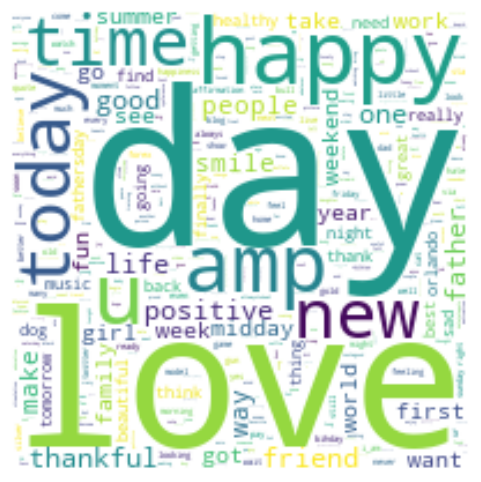

In [2494]:
text = " ".join(tweet for tweet in df_cleaned['cleaned_tweet'])

wc = WordCloud(background_color="white",
               width=200, 
               height=200,
               contour_width=0,
               contour_color="red",
               max_words=1000,
               scale=1,
               collocations=False,
               repeat=False,
               min_font_size=1)

wc.generate(text)

plt.figure(figsize=[6, 6])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")  # Versteckt die Achsen
plt.show()
